# Instituto Tecnológico de Costa Rica

### Escuela de Ingeniería en Computación

### Maestría Académica en Ciencias de la Computación

### Curso: Aprendizaje Automático (Machine Learning)

# Proyecto Final
- Agregar nombre del proyecto
## Estudiantes:
- Emmanuel Rosales Salas - 2013108931
- Alejandro Arroyo Valle

# Carga de Bibliotecas y Dataset

## Instalar las bibliotecas necesarias

In [42]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Importación de la clases

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

## Importar los datos.

In [44]:
raw_dataset = pd.read_csv('multi_data_01.csv', header = 0, parse_dates = [0], index_col = 0)
raw_dataset.head()

,runautomode_bool,actual_speed_m_min,secundary_pumpspeed_rpm,secundary_pa16d1_bar,secundary_p014d1_bar,secundary_p015d1_bar,secundary_pa7b3_mm,secundary_pa4b2_c,secundary_pa4b5_c,secundary_pu2b2_c,...,primary_p015d1_bar,primary_pa7b3_mm,primary_pa4b2_c,primary_pa4b5_c,primary_pu2b2_c,primary_p012b3_c,primary_p022b3_c,primary_pa16d6_c,primary_p014d6_c,primary_p015d6_c
date_time,,,,,,,,,,,,,,,,,,,,,
2023-06-22 14:17:24.698380,t,3.500000,21.831861,33.174477,94.676770,57.584450,33.328247,99.9,103.1,99.9,...,76.056860,225.26270,101.3,99.7,99.9,86.3,100.2,869.9,98.9,103.5
2023-06-22 14:17:30.468259,t,3.702725,25.683084,32.924850,97.399980,59.626854,33.132996,99.9,103.1,99.9,...,81.423840,224.77570,101.7,99.7,99.8,86.1,100.1,869.9,98.9,103.3
2023-06-22 14:17:35.891179,t,4.082303,28.471409,32.860012,102.812355,63.836475,33.035340,99.9,103.2,99.9,...,81.900406,224.58087,101.7,99.7,99.6,86.1,100.2,869.9,98.8,103.2
2023-06-22 14:17:40.972308,t,4.322869,30.506277,32.804900,106.148280,66.593720,33.100403,99.9,103.2,99.9,...,81.696170,224.45099,101.9,99.6,99.7,85.8,100.0,869.9,98.7,103.1
2023-06-22 14:17:46.051777,t,4.709167,32.320232,32.584450,111.163510,70.587750,33.035340,99.9,103.2,99.9,...,86.416390,224.54840,101.9,99.6,99.7,85.6,99.9,869.9,98.6,102.9


# Exploración de Datos

## Contexto de los datos

![Texto alternativo](image005.png)
![Texto alternativo](drum_press.jpg)

Este dataset contiene datos de dos máquinas de producción, estas máquinas son prensas hidráulicas que bombean material adhesivo sobre una lámina plástica, similares a la imagen anterior. Además del timestamp, las columnas representan valores de diferentes sensores que tiene cada prensa. 

En el nombre de cada columna hay un sufijo que describe si el valor corresponde a la prensa "secundary" o "primary". Después de este sufijo, se especifíca el nombre del sensor que está siendo leído, finalmente los nombres de las columnas termina con la unidad de la variable en cuestión.

El nombre del sensor se puede referenciar en la primer imagen.

In [45]:
print("Descripción del Dataset");
raw_dataset.describe()

Descripción del Dataset


,actual_speed_m_min,secundary_pumpspeed_rpm,secundary_pa16d1_bar,secundary_p014d1_bar,secundary_p015d1_bar,secundary_pa7b3_mm,secundary_pa4b2_c,secundary_pa4b5_c,secundary_pu2b2_c,secundary_p012b3_c,...,primary_p015d1_bar,primary_pa7b3_mm,primary_pa4b2_c,primary_pa4b5_c,primary_pu2b2_c,primary_p012b3_c,primary_p022b3_c,primary_pa16d6_c,primary_p014d6_c,primary_p015d6_c
count,939781.000000,939781.000000,939781.000000,939781.000000,939781.000000,939781.000000,939781.000000,939781.000000,939781.000000,939781.000000,...,939781.000000,939781.000000,939781.000000,939781.000000,939781.000000,939781.000000,939781.000000,939781.000000,939781.000000,939781.000000
mean,3.173700,35.535232,25.243818,76.610402,47.184574,312.270014,86.604708,90.091598,86.239594,79.854949,...,66.697541,398.079088,95.233500,92.271378,92.314973,80.973191,117.102273,443.144345,112.284371,263.726052
std,3.198930,29.190585,13.188008,60.827016,43.669193,164.502212,35.158704,36.297575,38.500836,38.295258,...,58.761401,235.248636,23.049115,18.940938,19.061811,23.778990,146.902585,385.866558,120.842155,298.681933
min,0.000000,0.000000,-24.998379,-87.494320,-87.494320,-11.489197,21.900000,-199.700000,21.900000,-200.000000,...,-87.494320,-8.928711,-200.000000,22.000000,21.100000,16.800000,19.600000,-170.600000,21.000000,-200.000000
25%,0.000000,0.110744,27.228813,13.979121,-0.260974,168.529110,93.900000,101.900000,91.200000,82.900000,...,9.224858,215.067750,98.700000,96.700000,96.600000,82.600000,99.500000,104.600000,92.800000,88.300000
50%,3.000000,40.756966,30.691174,90.353690,53.272705,326.285160,99.900000,103.700000,99.900000,94.200000,...,83.670490,374.388060,103.700000,99.900000,99.800000,86.300000,99.900000,106.300000,98.700000,108.600000
75%,6.500000,56.406920,34.030342,136.194320,90.864290,462.918100,100.100000,104.300000,100.100000,96.500000,...,113.628990,553.189150,105.200000,100.100000,100.200000,98.100000,100.200000,869.900000,103.300000,342.100000
max,7.899999,100.000000,42.067040,299.972440,277.052120,1006.943700,869.900000,869.900000,869.900000,869.900000,...,371.796970,977.902600,869.900000,869.900000,869.900000,869.900000,869.900000,869.900000,869.900000,869.900000


In [46]:
print(f"Las dimensiones del dataset son (filas, columnas): {raw_dataset.shape}")

Las dimensiones del dataset son (filas, columnas): (939781, 29)


In [47]:
raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 939781 entries, 2023-06-22 14:17:24.698380 to 2023-08-17 14:06:55.144016
Data columns (total 29 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   runautomode_bool             939781 non-null  object 
 1   actual_speed_m_min           939781 non-null  float64
 2   secundary_pumpspeed_rpm      939781 non-null  float64
 3   secundary_pa16d1_bar         939781 non-null  float64
 4   secundary_p014d1_bar         939781 non-null  float64
 5   secundary_p015d1_bar         939781 non-null  float64
 6   secundary_pa7b3_mm           939781 non-null  float64
 7   secundary_pa4b2_c            939781 non-null  float64
 8   secundary_pa4b5_c            939781 non-null  float64
 9   secundary_pu2b2_c            939781 non-null  float64
 10  secundary_p012b3_c           939781 non-null  float64
 11  secundary_p022b3_c           939781 non-null  float64
 12  secundary_

## Gráficos

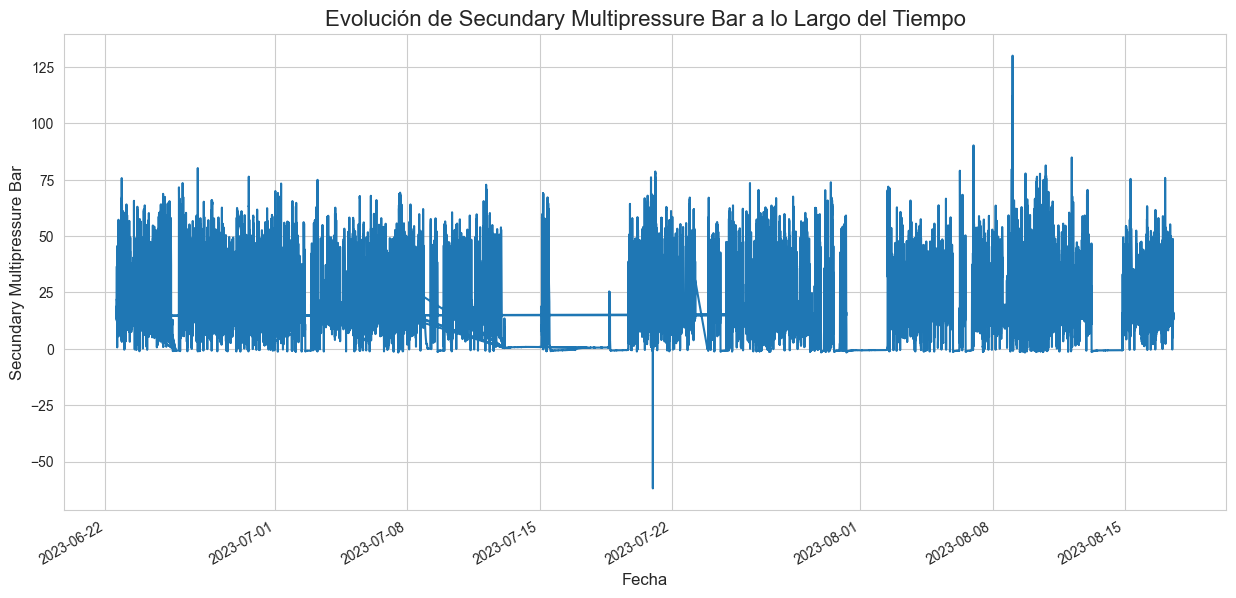

In [48]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 7) # Aumentar el tamaño del gráfico

raw_dataset['secundary_multipressure_bar'].plot()

# Añadir títulos y etiquetas para mayor claridad
plt.title('Evolución de Secundary Multipressure Bar a lo Largo del Tiempo', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Secundary Multipressure Bar', fontsize=12)
plt.show()

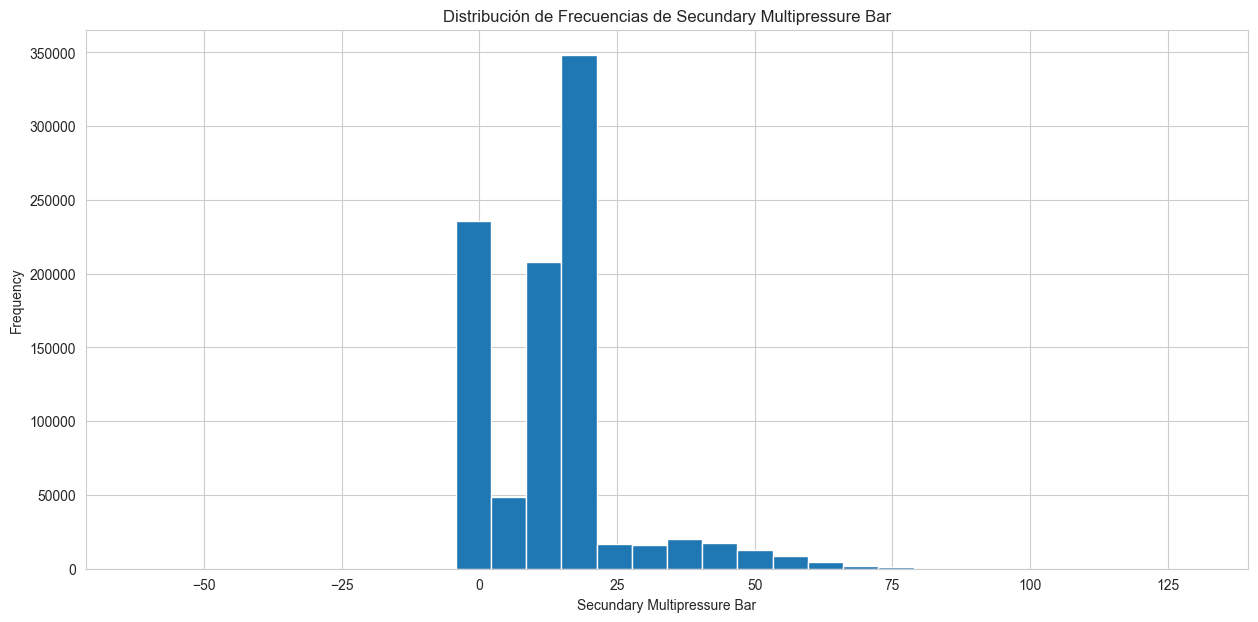

In [49]:
raw_dataset['secundary_multipressure_bar'].plot(kind='hist', bins=30, title='Distribución de Frecuencias de Secundary Multipressure Bar')
plt.xlabel('Secundary Multipressure Bar')
plt.show()

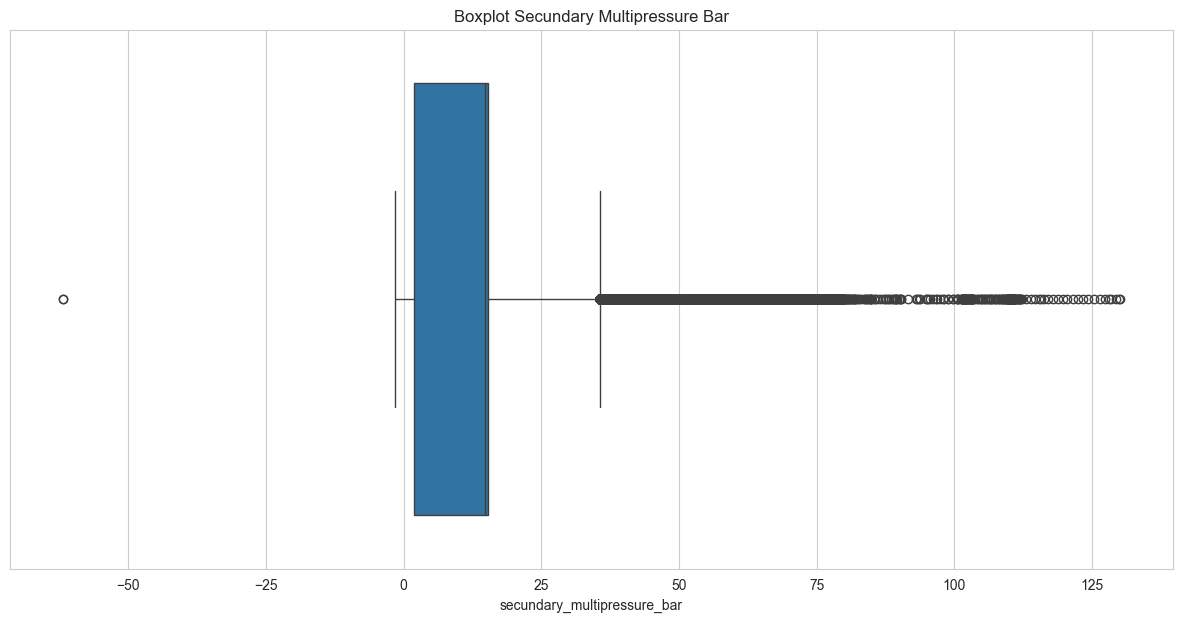

In [50]:
sns.boxplot(x=raw_dataset['secundary_multipressure_bar'])
plt.title('Boxplot Secundary Multipressure Bar')
plt.show()

# Preprocesamiento de Datos

## Eliminación de las columnas primary

Dada la naturaleza de nuestro proyecto, queremos predecir la variable secundary_multipressure_bar, por esta razón, todas las caracterísiticas que influyen en ella son las que tienen como pre fijos "secundary". Por esta razón, las columnas que son de primary, no son necesarias para nuestra predicción, por lo tanto procedemos a eliminarlas.

In [51]:
# Eliminar las columnas relacionadas con primary 

# Primero se obtienen los nombres de las columnas que contienen 'primary'
primary_columns = raw_dataset.filter(like = 'primary').columns

# Eliminamos las columnas del DataFrame
processed_dataset = raw_dataset.drop(columns = primary_columns)

# Imprimir la cantidad de columnas eliminadas y las primeras filas del nuevo DataFrame
print("\nDataFrame después de eliminar las columnas:")
print(f"Se eliminaron {len(primary_columns)}")
processed_dataset.head()



DataFrame después de eliminar las columnas:
Se eliminaron 13


,runautomode_bool,actual_speed_m_min,secundary_pumpspeed_rpm,secundary_pa16d1_bar,secundary_p014d1_bar,secundary_p015d1_bar,secundary_pa7b3_mm,secundary_pa4b2_c,secundary_pa4b5_c,secundary_pu2b2_c,secundary_p012b3_c,secundary_p022b3_c,secundary_pa16d6_c,secundary_p014d6_c,secundary_p015d6_c,secundary_multipressure_bar
date_time,,,,,,,,,,,,,,,,
2023-06-22 14:17:24.698380,t,3.500000,21.831861,33.174477,94.676770,57.584450,33.328247,99.9,103.1,99.9,93.9,99.9,102.2,95.8,108.8,15.024406
2023-06-22 14:17:30.468259,t,3.702725,25.683084,32.924850,97.399980,59.626854,33.132996,99.9,103.1,99.9,93.9,99.8,102.1,95.8,108.8,14.090146
2023-06-22 14:17:35.891179,t,4.082303,28.471409,32.860012,102.812355,63.836475,33.035340,99.9,103.2,99.9,93.8,100.1,102.2,95.8,108.6,14.032947
2023-06-22 14:17:40.972308,t,4.322869,30.506277,32.804900,106.148280,66.593720,33.100403,99.9,103.2,99.9,93.8,100.3,102.2,95.8,108.6,13.346553
2023-06-22 14:17:46.051777,t,4.709167,32.320232,32.584450,111.163510,70.587750,33.035340,99.9,103.2,99.9,93.8,100.3,102.2,95.8,108.6,13.003356


## Verificación de la columna de tiempo este en el formato y tipo correcto

In [52]:
# Validar el tipo de la columna de tiempo sea el indice
print(processed_dataset.index)

DatetimeIndex(['2023-06-22 14:17:24.698380', '2023-06-22 14:17:30.468259',
               '2023-06-22 14:17:35.891179', '2023-06-22 14:17:40.972308',
               '2023-06-22 14:17:46.051777', '2023-06-22 14:17:51.128885',
               '2023-06-22 14:17:56.211378', '2023-06-22 14:18:01.303424',
               '2023-06-22 14:18:06.391151', '2023-06-22 14:18:11.769742',
               ...
               '2023-08-17 14:06:09.412751', '2023-08-17 14:06:14.516200',
               '2023-08-17 14:06:19.599293', '2023-08-17 14:06:24.668499',
               '2023-08-17 14:06:29.758595', '2023-08-17 14:06:34.836618',
               '2023-08-17 14:06:39.920084', '2023-08-17 14:06:45.001977',
               '2023-08-17 14:06:50.075040', '2023-08-17 14:06:55.144016'],
              dtype='datetime64[ns]', name='date_time', length=939781, freq=None)


In [53]:
#Validamos si la columna de tiempo está en el formato correcto
print(f"Tipo de dato: {processed_dataset.index.dtype}")


Tipo de dato: datetime64[ns]


## Verificación de valores nulos

Las series de tiempo no pueden procesar valores nulos, por lo cual validamos que no existan

In [54]:
# Valorizamos si existen valores nulos en el dataset
null_values = processed_dataset.isnull().sum()
print("\nValores nulos por columna:")
print(null_values)


Valores nulos por columna:
runautomode_bool               0
actual_speed_m_min             0
secundary_pumpspeed_rpm        0
secundary_pa16d1_bar           0
secundary_p014d1_bar           0
secundary_p015d1_bar           0
secundary_pa7b3_mm             0
secundary_pa4b2_c              0
secundary_pa4b5_c              0
secundary_pu2b2_c              0
secundary_p012b3_c             0
secundary_p022b3_c             0
secundary_pa16d6_c             0
secundary_p014d6_c             0
secundary_p015d6_c             0
secundary_multipressure_bar    0
dtype: int64


## Procesamiento de variable categórica.

Nuestro dataset presenta una variable categórica (runautomode_bool), la cual indica si la máquina esta funcionando o no, al ser un valor booleano, debemos procesarla como variable ordinal, ya que el valor true o 1 significa que la máquina esta funcionando y false o 0, que la máquina no esta funcionando, lo que hace que cuantitativamente 1 sea más que 0.

In [55]:
encoder = LabelEncoder()
processed_dataset['runautomode_bool'] = encoder.fit_transform(processed_dataset['runautomode_bool'])
processed_dataset.head()

,runautomode_bool,actual_speed_m_min,secundary_pumpspeed_rpm,secundary_pa16d1_bar,secundary_p014d1_bar,secundary_p015d1_bar,secundary_pa7b3_mm,secundary_pa4b2_c,secundary_pa4b5_c,secundary_pu2b2_c,secundary_p012b3_c,secundary_p022b3_c,secundary_pa16d6_c,secundary_p014d6_c,secundary_p015d6_c,secundary_multipressure_bar
date_time,,,,,,,,,,,,,,,,
2023-06-22 14:17:24.698380,1,3.500000,21.831861,33.174477,94.676770,57.584450,33.328247,99.9,103.1,99.9,93.9,99.9,102.2,95.8,108.8,15.024406
2023-06-22 14:17:30.468259,1,3.702725,25.683084,32.924850,97.399980,59.626854,33.132996,99.9,103.1,99.9,93.9,99.8,102.1,95.8,108.8,14.090146
2023-06-22 14:17:35.891179,1,4.082303,28.471409,32.860012,102.812355,63.836475,33.035340,99.9,103.2,99.9,93.8,100.1,102.2,95.8,108.6,14.032947
2023-06-22 14:17:40.972308,1,4.322869,30.506277,32.804900,106.148280,66.593720,33.100403,99.9,103.2,99.9,93.8,100.3,102.2,95.8,108.6,13.346553
2023-06-22 14:17:46.051777,1,4.709167,32.320232,32.584450,111.163510,70.587750,33.035340,99.9,103.2,99.9,93.8,100.3,102.2,95.8,108.6,13.003356


## Selección de Features

### Mutual Information

In [56]:
from sklearn.feature_selection import mutual_info_regression

X = processed_dataset.drop(columns=["secundary_multipressure_bar"])
y = processed_dataset["secundary_multipressure_bar"]

mi = mutual_info_regression(X, y)
mi_series = pd.Series(mi, index=X.columns).sort_values(ascending=False)
print(mi_series)


secundary_p014d1_bar       1.257724
secundary_pa7b3_mm         1.224913
secundary_pa16d1_bar       1.129596
secundary_p015d1_bar       1.089119
secundary_pa4b2_c          1.038079
secundary_p014d6_c         1.031274
secundary_pa4b5_c          1.016837
secundary_pa16d6_c         1.016092
secundary_pu2b2_c          1.006205
secundary_p012b3_c         0.994347
secundary_p015d6_c         0.980700
secundary_p022b3_c         0.896273
secundary_pumpspeed_rpm    0.741075
actual_speed_m_min         0.526418
runautomode_bool           0.445021
dtype: float64


### Correlación Pearson

In [57]:
# Convertir columna booleana (si viene como 't'/'f')
if X["runautomode_bool"].dtype == object:
    X["runautomode_bool"] = X["runautomode_bool"].map({"t": 1, "f": 0})

# Calcular correlación de Pearson de cada feature respecto al target
pearson_corr = X.corrwith(y)

# Mostrar ordenado de mayor a menor correlación
print(pearson_corr.sort_values(ascending=False))

secundary_p022b3_c         0.609788
secundary_p014d6_c         0.581808
secundary_pa16d1_bar       0.580413
secundary_p015d6_c         0.537060
secundary_pa4b5_c          0.421461
secundary_pa4b2_c          0.415851
secundary_p012b3_c         0.411354
secundary_pu2b2_c          0.387175
secundary_p014d1_bar       0.336581
secundary_p015d1_bar       0.297783
runautomode_bool           0.174090
actual_speed_m_min         0.138413
secundary_pa16d6_c        -0.100991
secundary_pa7b3_mm        -0.207830
secundary_pumpspeed_rpm   -0.238969
dtype: float64


- Si MI es alta y Pearson es baja → relación fuertemente no lineal

- Si ambas son altas → relación lineal + no lineal

- Si Pearson es alta y MI es baja → relación lineal simple (casi no pasa en tu dataset)

| Feature                 | MI        | Pearson     | Interpretación del tipo de relación         |
|-------------------------|-----------|-------------|----------------------------------------------|
| secundary_p014d1_bar    | 1.257104  | 0.336581    | Alta importancia no lineal                  |
| secundary_pa7b3_mm      | 1.224553  | -0.207830   | Fuerte relación no lineal, invertida        |
| secundary_pa16d1_bar    | 1.129050  | 0.580413    | Relación mixta: lineal + no lineal          |
| secundary_p015d1_bar    | 1.088624  | 0.297783    | No lineal moderada                           |
| secundary_pa4b2_c       | 1.038111  | 0.415851    | Relación mixta                               |
| secundary_p014d6_c      | 1.030959  | 0.581808    | Lineal moderada + componente no lineal       |
| secundary_pa16d6_c      | 1.017278  | -0.100991   | No lineal débil, posible cambio de pendiente |
| secundary_pa4b5_c       | 1.016413  | 0.421461    | Mixta                                        |
| secundary_pu2b2_c       | 1.006020  | 0.387175    | Mixta                                        |
| secundary_p012b3_c      | 0.995920  | 0.411354    | Mixta                                        |
| secundary_p015d6_c      | 0.979866  | 0.537060    | Principalmente lineal                        |
| secundary_p022b3_c      | 0.896165  | 0.609788    | Fuerte componente lineal                     |
| secundary_pumpspeed_rpm | 0.741241  | -0.238969   | No lineal, efecto inverso                    |
| actual_speed_m_min      | 0.526204  | 0.138413    | Débil lineal + algo de no linealidad         |
| runautomode_bool        | 0.445946  | 0.174090    | Baja información lineal y no lineal          |


Tomando esta información se toma la decisión de descartar las variables "runautomode_bool" y "actual_speed_m_min". Estas variables aportan muy poca información sobre el target, tanto lineal como no lineal.

In [58]:
processed_dataset.drop(columns=['actual_speed_m_min','runautomode_bool'], inplace=True)
processed_dataset

,secundary_pumpspeed_rpm,secundary_pa16d1_bar,secundary_p014d1_bar,secundary_p015d1_bar,secundary_pa7b3_mm,secundary_pa4b2_c,secundary_pa4b5_c,secundary_pu2b2_c,secundary_p012b3_c,secundary_p022b3_c,secundary_pa16d6_c,secundary_p014d6_c,secundary_p015d6_c,secundary_multipressure_bar
date_time,,,,,,,,,,,,,,
2023-06-22 14:17:24.698380,21.831861,33.174477,94.676770,57.584450,33.328247,99.9,103.1,99.9,93.9,99.9,102.2,95.8,108.8,15.024406
2023-06-22 14:17:30.468259,25.683084,32.924850,97.399980,59.626854,33.132996,99.9,103.1,99.9,93.9,99.8,102.1,95.8,108.8,14.090146
2023-06-22 14:17:35.891179,28.471409,32.860012,102.812355,63.836475,33.035340,99.9,103.2,99.9,93.8,100.1,102.2,95.8,108.6,14.032947
2023-06-22 14:17:40.972308,30.506277,32.804900,106.148280,66.593720,33.100403,99.9,103.2,99.9,93.8,100.3,102.2,95.8,108.6,13.346553
2023-06-22 14:17:46.051777,32.320232,32.584450,111.163510,70.587750,33.035340,99.9,103.2,99.9,93.8,100.3,102.2,95.8,108.6,13.003356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-17 14:06:34.836618,26.234114,36.341827,109.972115,76.862470,307.765840,100.2,104.8,99.9,94.1,99.9,102.8,93.2,110.2,15.234137
2023-08-17 14:06:39.920084,26.210611,36.341827,109.563640,76.680920,307.733280,100.2,104.8,99.9,94.1,99.6,102.8,93.2,110.3,15.005339
2023-08-17 14:06:45.001977,26.186130,36.338585,109.472860,76.590160,307.700740,100.3,104.9,99.9,94.1,99.7,102.8,93.2,110.4,14.776541


In [59]:
processed_dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 939781 entries, 2023-06-22 14:17:24.698380 to 2023-08-17 14:06:55.144016
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   secundary_pumpspeed_rpm      939781 non-null  float64
 1   secundary_pa16d1_bar         939781 non-null  float64
 2   secundary_p014d1_bar         939781 non-null  float64
 3   secundary_p015d1_bar         939781 non-null  float64
 4   secundary_pa7b3_mm           939781 non-null  float64
 5   secundary_pa4b2_c            939781 non-null  float64
 6   secundary_pa4b5_c            939781 non-null  float64
 7   secundary_pu2b2_c            939781 non-null  float64
 8   secundary_p012b3_c           939781 non-null  float64
 9   secundary_p022b3_c           939781 non-null  float64
 10  secundary_pa16d6_c           939781 non-null  float64
 11  secundary_p014d6_c           939781 non-null  float64
 12  secundary_

## Filtrado e imputación de datos

Como se ve en la descripción de los datos en la tabla de abajo, existen valores de sensores que son negativos, sin embargo con el criterio del experto del área, no pueden existir presiones ni temperaturas negativas ya que es físicamente imposible, pueden ser errores en sensores, malas calibraciones, etc. Por lo tanto estos datos deben de tratarse.

In [60]:
processed_dataset.describe()

,secundary_pumpspeed_rpm,secundary_pa16d1_bar,secundary_p014d1_bar,secundary_p015d1_bar,secundary_pa7b3_mm,secundary_pa4b2_c,secundary_pa4b5_c,secundary_pu2b2_c,secundary_p012b3_c,secundary_p022b3_c,secundary_pa16d6_c,secundary_p014d6_c,secundary_p015d6_c,secundary_multipressure_bar
count,939781.000000,939781.000000,939781.000000,939781.000000,939781.000000,939781.000000,939781.000000,939781.000000,939781.000000,939781.000000,939781.000000,939781.000000,939781.000000,939781.000000
mean,35.535232,25.243818,76.610402,47.184574,312.270014,86.604708,90.091598,86.239594,79.854949,82.333884,113.969462,79.217654,90.614959,13.407878
std,29.190585,13.188008,60.827016,43.669193,164.502212,35.158704,36.297575,38.500836,38.295258,31.235942,137.691665,25.599289,37.586891,12.227220
min,0.000000,-24.998379,-87.494320,-87.494320,-11.489197,21.900000,-199.700000,21.900000,-200.000000,22.200000,-163.900000,22.200000,-193.100000,-61.889874
25%,0.110744,27.228813,13.979121,-0.260974,168.529110,93.900000,101.900000,91.200000,82.900000,83.700000,101.100000,83.600000,92.800000,1.849451
50%,40.756966,30.691174,90.353690,53.272705,326.285160,99.900000,103.700000,99.900000,94.200000,99.800000,102.000000,91.000000,107.400000,14.833740
75%,56.406920,34.030342,136.194320,90.864290,462.918100,100.100000,104.300000,100.100000,96.500000,100.200000,102.900000,94.200000,112.000000,15.367602
max,100.000000,42.067040,299.972440,277.052120,1006.943700,869.900000,869.900000,869.900000,869.900000,200.900000,869.900000,869.900000,869.900000,130.033550


Como estas filas perteneces a una secuencia de datos, eliminarlas podría significar una perdida de información o podría entrenarse el modelo con eventos con gaps incoherentes, deformar los lags (ya que no sería espacios iguales)

In [61]:
processed_dataset.count()

secundary_pumpspeed_rpm        939781
secundary_pa16d1_bar           939781
secundary_p014d1_bar           939781
secundary_p015d1_bar           939781
secundary_pa7b3_mm             939781
secundary_pa4b2_c              939781
secundary_pa4b5_c              939781
secundary_pu2b2_c              939781
secundary_p012b3_c             939781
secundary_p022b3_c             939781
secundary_pa16d6_c             939781
secundary_p014d6_c             939781
secundary_p015d6_c             939781
secundary_multipressure_bar    939781
dtype: int64

In [62]:
cols = ["secundary_p014d1_bar", "secundary_pa16d1_bar", 
        "secundary_multipressure_bar", "secundary_pa7b3_mm",
       "secundary_p015d1_bar","secundary_pa4b5_c",
       "secundary_p012b3_c","secundary_pa16d6_c",
       "secundary_p015d6_c"]

(processed_dataset["secundary_p014d1_bar"] < 0).sum()

for col in cols:
    neg_values = (processed_dataset[col] < 0).sum()
    print(f"En la columna {col}: {neg_values} imputan")
    porcentage = neg_values/processed_dataset[col].count()*100 
    print(f"El porcetaje de datos perdido es de: {porcentage}")
    print("\n")

En la columna secundary_p014d1_bar: 7577 imputan
El porcetaje de datos perdido es de: 0.8062516692718836


En la columna secundary_pa16d1_bar: 367 imputan
El porcetaje de datos perdido es de: 0.039051651395378285


En la columna secundary_multipressure_bar: 157779 imputan
El porcetaje de datos perdido es de: 16.788911459159102


En la columna secundary_pa7b3_mm: 45 imputan
El porcetaje de datos perdido es de: 0.0047883496261363016


En la columna secundary_p015d1_bar: 259334 imputan
El porcetaje de datos perdido es de: 27.59515248765404


En la columna secundary_pa4b5_c: 2 imputan
El porcetaje de datos perdido es de: 0.0002128155389393912


En la columna secundary_p012b3_c: 5 imputan
El porcetaje de datos perdido es de: 0.0005320388473484779


En la columna secundary_pa16d6_c: 2 imputan
El porcetaje de datos perdido es de: 0.0002128155389393912


En la columna secundary_p015d6_c: 8 imputan
El porcetaje de datos perdido es de: 0.0008512621557575648




Todas las columnas, exceptuando las columns secundary_multipressure_bar y columna secundary_p015d1_bar, representan un bajo porcentaje de los datos por lo que se realizará la imputación sin mayor análisis:

In [63]:
cols = ["secundary_p014d1_bar", "secundary_pa16d1_bar", 
       "secundary_pa7b3_mm",
       "secundary_pa4b5_c",
       "secundary_p012b3_c","secundary_pa16d6_c",
       "secundary_p015d6_c"]

for col in cols:
    processed_dataset[col] = processed_dataset[col].mask(processed_dataset[col] < 0, np.nan)
    processed_dataset[col] = processed_dataset[col].interpolate(method="time")

processed_dataset.describe()

,secundary_pumpspeed_rpm,secundary_pa16d1_bar,secundary_p014d1_bar,secundary_p015d1_bar,secundary_pa7b3_mm,secundary_pa4b2_c,secundary_pa4b5_c,secundary_pu2b2_c,secundary_p012b3_c,secundary_p022b3_c,secundary_pa16d6_c,secundary_p014d6_c,secundary_p015d6_c,secundary_multipressure_bar
count,939781.000000,939781.000000,939781.000000,939781.000000,939781.000000,939781.000000,939781.000000,939781.000000,939781.000000,939781.000000,939781.000000,939781.000000,939781.000000,939781.000000
mean,35.535232,25.255371,77.332990,47.184574,312.270427,86.604708,90.092883,86.239594,79.858270,82.333884,113.970634,79.217654,90.619504,13.407878
std,29.190585,13.156916,59.389241,43.669193,164.501426,35.158704,36.300587,38.500836,38.310944,31.235942,137.692292,25.599289,37.600161,12.227220
min,0.000000,0.969332,0.805615,-87.494320,0.032532,21.900000,22.100000,21.900000,21.600000,22.200000,22.300000,22.200000,1.100000,-61.889874
25%,0.110744,27.228813,14.001815,-0.260974,168.529110,93.900000,101.900000,91.200000,82.900000,83.700000,101.100000,83.600000,92.800000,1.849451
50%,40.756966,30.691174,90.353690,53.272705,326.285160,99.900000,103.700000,99.900000,94.200000,99.800000,102.000000,91.000000,107.400000,14.833740
75%,56.406920,34.030342,136.194320,90.864290,462.918100,100.100000,104.300000,100.100000,96.500000,100.200000,102.900000,94.200000,112.000000,15.367602
max,100.000000,42.067040,299.972440,277.052120,1006.943700,869.900000,869.900000,869.900000,869.900000,200.900000,869.900000,869.900000,869.900000,130.033550


Sin embargo as columns secundary_multipressure_bar y columna secundary_p015d1_bar sí se van a ver a detalles los valores negativos

<Axes: xlabel='date_time'>

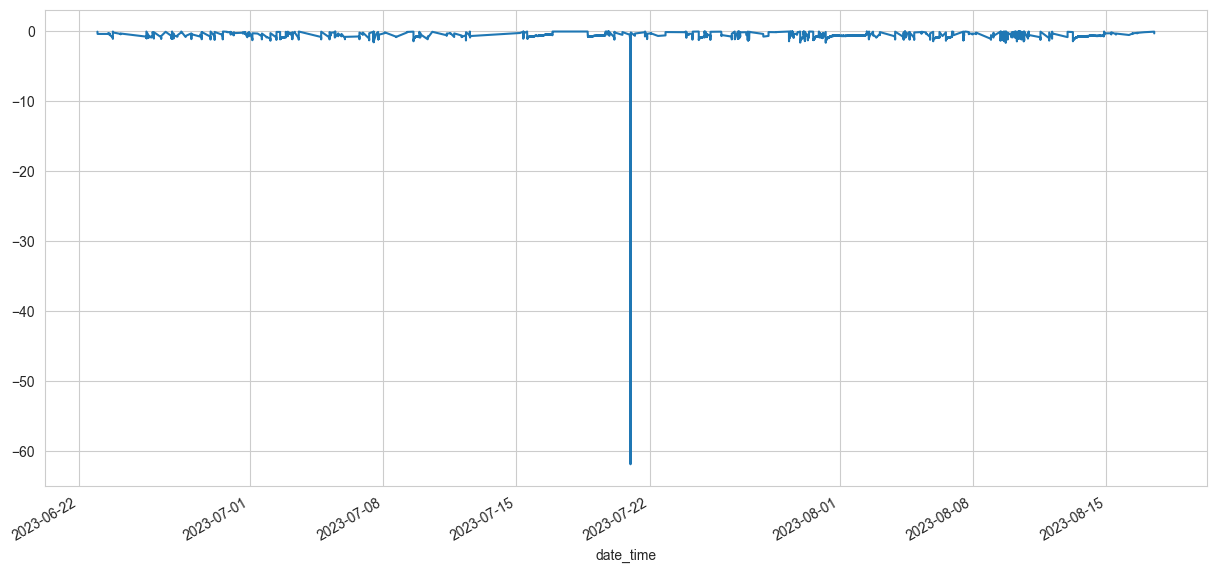

In [64]:
processed_dataset.secundary_multipressure_bar[processed_dataset.secundary_multipressure_bar<0].plot()

La gráfica evidencia como los valores menores a 0 con varios pero la mayoría están muy cerca de cero, se sospecha que el problema es calibraciones del equipo.

In [65]:
processed_dataset.secundary_multipressure_bar[processed_dataset.secundary_multipressure_bar<0].describe()

count    157779.000000
mean         -0.717227
std           0.292793
min         -61.889874
25%          -0.819860
50%          -0.667328
75%          -0.610128
max          -0.019067
Name: secundary_multipressure_bar, dtype: float64

In [66]:
IQR = processed_dataset.secundary_multipressure_bar[processed_dataset.secundary_multipressure_bar<0].quantile(0.75) - processed_dataset.secundary_multipressure_bar[processed_dataset.secundary_multipressure_bar<0].quantile(0.25)

LL = processed_dataset.secundary_multipressure_bar[processed_dataset.secundary_multipressure_bar<0].quantile(0.25) -1.5*IQR
LL

np.float64(-1.1344571)

Se toma la decisión de iterpolar solo los datos que se salen del límite de outliers en los datos menores a cero.

In [67]:
processed_dataset.secundary_multipressure_bar = processed_dataset.secundary_multipressure_bar.mask(processed_dataset.secundary_multipressure_bar < LL, np.nan)
processed_dataset.secundary_multipressure_bar = processed_dataset.secundary_multipressure_bar.interpolate(method="time")

<Axes: xlabel='date_time'>

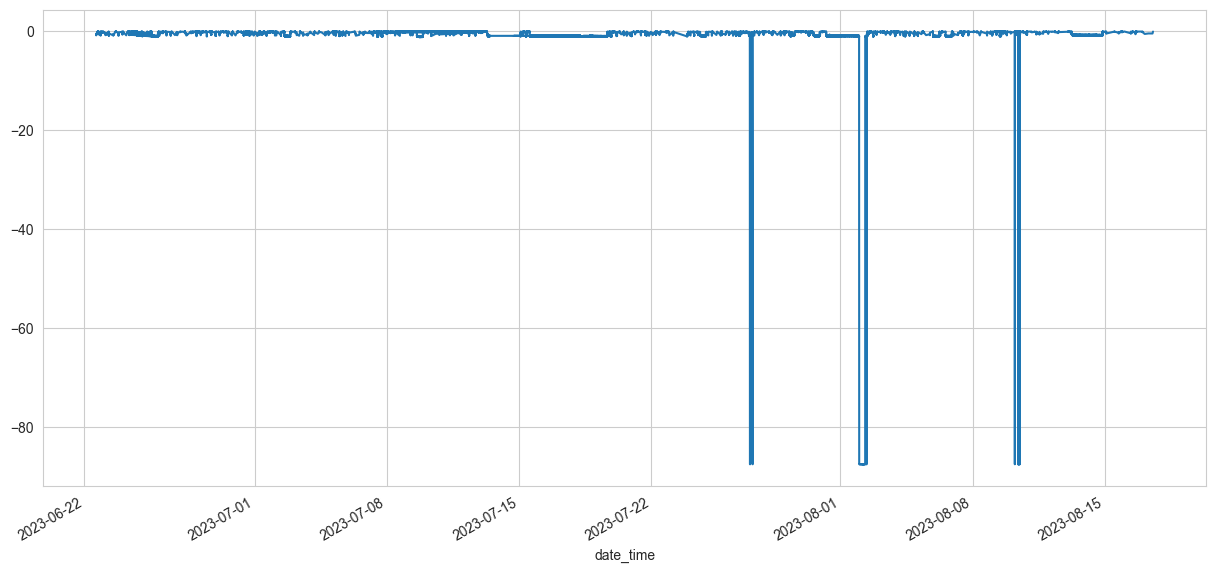

In [68]:
processed_dataset.secundary_p015d1_bar[processed_dataset.secundary_p015d1_bar<0].plot()

La gráfica evidencia como los valores menores a 0 con varios pero la mayoría están muy cerca de cero, se sospecha que el problema es calibraciones del equipo.

In [69]:
processed_dataset.secundary_p015d1_bar[processed_dataset.secundary_p015d1_bar<0].describe()

count    259334.000000
mean         -3.067981
std          13.843635
min         -87.494320
25%          -0.941775
50%          -0.885042
75%          -0.760228
max          -0.011347
Name: secundary_p015d1_bar, dtype: float64

In [70]:
IQR = processed_dataset.secundary_p015d1_bar[processed_dataset.secundary_p015d1_bar<0].quantile(0.75) - processed_dataset.secundary_p015d1_bar[processed_dataset.secundary_p015d1_bar<0].quantile(0.25)

LL = processed_dataset.secundary_p015d1_bar[processed_dataset.secundary_p015d1_bar<0].quantile(0.25) -1.5*IQR
LL

np.float64(-1.2140957)

Se toma la decisión de iterpolar solo los datos que se salen del límite de outliers en los datos menores a cero.

In [71]:
processed_dataset.secundary_p015d1_bar = processed_dataset.secundary_p015d1_bar.mask(processed_dataset.secundary_p015d1_bar < LL, np.nan)
processed_dataset.secundary_p015d1_bar = processed_dataset.secundary_p015d1_bar.interpolate(method="time")

#### Descripción Final de los datos

In [72]:
processed_dataset.describe()

,secundary_pumpspeed_rpm,secundary_pa16d1_bar,secundary_p014d1_bar,secundary_p015d1_bar,secundary_pa7b3_mm,secundary_pa4b2_c,secundary_pa4b5_c,secundary_pu2b2_c,secundary_p012b3_c,secundary_p022b3_c,secundary_pa16d6_c,secundary_p014d6_c,secundary_p015d6_c,secundary_multipressure_bar
count,939781.000000,939781.000000,939781.000000,939781.000000,939781.000000,939781.000000,939781.000000,939781.000000,939781.000000,939781.000000,939781.000000,939781.000000,939781.000000,939781.000000
mean,35.535232,25.255371,77.332990,47.840092,312.270427,86.604708,90.092883,86.239594,79.858270,82.333884,113.970634,79.217654,90.619504,13.409585
std,29.190585,13.156916,59.389241,42.303429,164.501426,35.158704,36.300587,38.500836,38.310944,31.235942,137.692292,25.599289,37.600161,12.225385
min,0.000000,0.969332,0.805615,-1.191402,0.032532,21.900000,22.100000,21.900000,21.600000,22.200000,22.300000,22.200000,1.100000,-1.124924
25%,0.110744,27.228813,14.001815,-0.124814,168.529110,93.900000,101.900000,91.200000,82.900000,83.700000,101.100000,83.600000,92.800000,1.868517
50%,40.756966,30.691174,90.353690,53.272705,326.285160,99.900000,103.700000,99.900000,94.200000,99.800000,102.000000,91.000000,107.400000,14.833740
75%,56.406920,34.030342,136.194320,90.864290,462.918100,100.100000,104.300000,100.100000,96.500000,100.200000,102.900000,94.200000,112.000000,15.367602
max,100.000000,42.067040,299.972440,277.052120,1006.943700,869.900000,869.900000,869.900000,869.900000,200.900000,869.900000,869.900000,869.900000,130.033550


## Lag Features
Vamos a generar un lag de 5. Vamos a usar lag features para darle al modelo una memoria del pasado. Básicamente, creamos nuevas columnas que contienen los valores de la variable de momentos anteriores. Esto es muy importante porque el modelo no entiende el tiempo por sí solo. Al darle estas pistas del pasado, le ayudamos a reconocer patrones y a usar la información anterior para predecir lo que va a suceder.

In [73]:
processed_dataset = processed_dataset.copy()

target_col = "secundary_multipressure_bar"

# Grupos de features según MI
group_A = [
    "secundary_p014d1_bar",
    "secundary_pa7b3_mm",
    "secundary_pa16d1_bar",
    "secundary_p015d1_bar",
    "secundary_pa4b2_c",
    "secundary_p014d6_c"
]

group_B = [
    "secundary_pa16d6_c",
    "secundary_pa4b5_c",
    "secundary_p012b3_c",
    "secundary_pu2b2_c",
    "secundary_p015d6_c",
    "secundary_p022b3_c"
]

group_C = [
    "secundary_pumpspeed_rpm"
]

# Número de lags por grupo
lags_A = 36
lags_B = 12
lags_C = 4

# Función para generar lags de una lista de columnas
def create_lags(df, cols, n_lags):
    for col in cols:
        for lag in range(1, n_lags + 1):
            df[f"{col}_lag_{lag}"] = df[col].shift(lag)

# Crear lags por grupo directamente en processed_dataset
create_lags(processed_dataset, group_A, lags_A)
create_lags(processed_dataset, group_B, lags_B)
create_lags(processed_dataset, group_C, lags_C)

# Crear el target futuro (+12 pasos = ~1 minuto hacia adelante)
processed_dataset["target_plus_12"] = processed_dataset[target_col].shift(-12)

# Eliminar filas con NaN (primeros 36 y últimos 12)
processed_dataset = processed_dataset.dropna()


processed_dataset.shape, processed_dataset.head()


/var/folders/r6/gz2385611tq1vsnbq6sl32bw0000gn/T/ipykernel_2137/3494910888.py:37: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{col}_lag_{lag}"] = df[col].shift(lag)
/var/folders/r6/gz2385611tq1vsnbq6sl32bw0000gn/T/ipykernel_2137/3494910888.py:37: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{col}_lag_{lag}"] = df[col].shift(lag)
/var/folders/r6/gz2385611tq1vsnbq6sl32bw0000gn/T/ipykernel_2137/3494910888.py:37: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` ma

((939733, 307),
                             secundary_pumpspeed_rpm  secundary_pa16d1_bar  \
 date_time                                                                   
 2023-06-22 14:20:29.950502                39.432655             31.660505   
 2023-06-22 14:20:35.029907                40.503200             31.534071   
 2023-06-22 14:20:40.101851                41.316950             31.751280   
 2023-06-22 14:20:45.173293                40.128124             31.689682   
 2023-06-22 14:20:50.241122                40.182632             31.624846   
 
                             secundary_p014d1_bar  secundary_p015d1_bar  \
 date_time                                                                
 2023-06-22 14:20:29.950502             123.89450             83.057770   
 2023-06-22 14:20:35.029907             123.79238             83.443560   
 2023-06-22 14:20:40.101851             123.84911             82.819490   
 2023-06-22 14:20:45.173293             123.59949            

Los lags usan shift positivo porque miran al pasado, mientras que el target futuro usa shift negativo porque trae el futuro al presente para entrenar el modelo.

In [74]:
#Creamos un Lag de 5
numOfLags = 6

for i in range(1, numOfLags):
    processed_dataset[f't-{i}'] = processed_dataset['secundary_multipressure_bar'].shift(i)

processed_dataset = processed_dataset.dropna()

processed_dataset.head(10)

/var/folders/r6/gz2385611tq1vsnbq6sl32bw0000gn/T/ipykernel_2137/294046916.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  processed_dataset[f't-{i}'] = processed_dataset['secundary_multipressure_bar'].shift(i)
/var/folders/r6/gz2385611tq1vsnbq6sl32bw0000gn/T/ipykernel_2137/294046916.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  processed_dataset[f't-{i}'] = processed_dataset['secundary_multipressure_bar'].shift(i)
/var/folders/r6/gz2385611tq1vsnbq6sl32bw0000gn/T/ipykernel_2137/294046916.py:5: PerformanceWarning: DataFr

,secundary_pumpspeed_rpm,secundary_pa16d1_bar,secundary_p014d1_bar,secundary_p015d1_bar,secundary_pa7b3_mm,secundary_pa4b2_c,secundary_pa4b5_c,secundary_pu2b2_c,secundary_p012b3_c,secundary_p022b3_c,...,secundary_pumpspeed_rpm_lag_1,secundary_pumpspeed_rpm_lag_2,secundary_pumpspeed_rpm_lag_3,secundary_pumpspeed_rpm_lag_4,target_plus_12,t-1,t-2,t-3,t-4,t-5
date_time,,,,,,,,,,,,,,,,,,,,,
2023-06-22 14:20:55.316144,40.598020,31.553522,123.259090,82.864876,27.274475,99.9,103.2,99.9,95.2,99.8,...,40.182632,40.128124,41.316950,40.503200,14.910006,15.005339,15.348536,15.443869,15.329469,14.890940
2023-06-22 14:21:00.386923,40.630264,31.585941,122.703100,82.195420,27.274475,99.9,103.3,99.8,95.3,99.6,...,40.598020,40.182632,40.128124,41.316950,15.253203,14.776541,15.005339,15.348536,15.443869,15.329469
2023-06-22 14:21:05.472136,40.079910,31.572973,122.635020,82.388310,26.949036,99.9,103.3,99.9,95.4,99.9,...,40.630264,40.598020,40.182632,40.128124,14.414277,15.272269,14.776541,15.005339,15.348536,15.443869
2023-06-22 14:21:10.550901,40.567593,31.543797,123.134280,82.808136,26.721191,100.0,103.3,99.8,95.6,100.2,...,40.079910,40.630264,40.598020,40.182632,15.348536,15.424802,15.272269,14.776541,15.005339,15.348536
2023-06-22 14:21:15.616747,41.335390,31.657265,123.077540,82.501780,26.591003,99.9,103.3,99.9,95.7,100.2,...,40.567593,40.079910,40.630264,40.598020,15.176937,14.414277,15.424802,15.272269,14.776541,15.005339
2023-06-22 14:21:20.901161,39.934322,31.608635,121.942870,81.775590,26.265503,99.9,103.2,99.8,95.7,99.9,...,41.335390,40.567593,40.079910,40.630264,14.395210,15.234137,14.414277,15.424802,15.272269,14.776541
2023-06-22 14:21:26.135029,40.293430,31.699410,122.816570,82.365616,26.102783,99.9,103.2,99.8,95.8,99.7,...,39.934322,41.335390,40.567593,40.079910,15.272269,15.005339,15.234137,14.414277,15.424802,15.272269
2023-06-22 14:21:31.314520,40.587150,31.641054,122.964070,82.365616,26.135315,99.9,103.2,99.8,96.0,99.7,...,40.293430,39.934322,41.335390,40.567593,15.196004,15.215070,15.005339,15.234137,14.414277,15.424802
2023-06-22 14:21:36.421265,40.203896,31.744795,122.782524,82.150030,26.102783,99.9,103.2,99.8,96.1,99.9,...,40.587150,40.293430,39.934322,41.335390,15.157870,15.234137,15.215070,15.005339,15.234137,14.414277


## Rolling Means

In [75]:
window_size = 5

processed_dataset['secundary_multipressure_bar_MEAN'] = processed_dataset['secundary_multipressure_bar'].shift(1).rolling(window=window_size).mean()
processed_dataset['secundary_multipressure_bar_STD'] = processed_dataset['secundary_multipressure_bar'].shift(1).rolling(window=window_size).std()
processed_dataset['secundary_multipressure_bar_MIN'] = processed_dataset['secundary_multipressure_bar'].shift(1).rolling(window=window_size).min()
processed_dataset['secundary_multipressure_bar_MAX'] = processed_dataset['secundary_multipressure_bar'].shift(1).rolling(window=window_size).max()
processed_dataset = processed_dataset.dropna()
processed_dataset.head(10)

/var/folders/r6/gz2385611tq1vsnbq6sl32bw0000gn/T/ipykernel_2137/3316008360.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  processed_dataset['secundary_multipressure_bar_MEAN'] = processed_dataset['secundary_multipressure_bar'].shift(1).rolling(window=window_size).mean()
/var/folders/r6/gz2385611tq1vsnbq6sl32bw0000gn/T/ipykernel_2137/3316008360.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  processed_dataset['secundary_multipressure_bar_STD'] = processed_dataset['secundary_multipressure_bar'].shift(1).rolling(window=win

,secundary_pumpspeed_rpm,secundary_pa16d1_bar,secundary_p014d1_bar,secundary_p015d1_bar,secundary_pa7b3_mm,secundary_pa4b2_c,secundary_pa4b5_c,secundary_pu2b2_c,secundary_p012b3_c,secundary_p022b3_c,...,target_plus_12,t-1,t-2,t-3,t-4,t-5,secundary_multipressure_bar_MEAN,secundary_multipressure_bar_STD,secundary_multipressure_bar_MIN,secundary_multipressure_bar_MAX
date_time,,,,,,,,,,,,,,,,,,,,,
2023-06-22 14:21:20.901161,39.934322,31.608635,121.942870,81.775590,26.265503,99.9,103.2,99.8,95.7,99.9,...,14.395210,15.234137,14.414277,15.424802,15.272269,14.776541,15.024405,0.418161,14.414277,15.424802
2023-06-22 14:21:26.135029,40.293430,31.699410,122.816570,82.365616,26.102783,99.9,103.2,99.8,95.8,99.7,...,15.272269,15.005339,15.234137,14.414277,15.424802,15.272269,15.070165,0.396198,14.414277,15.424802
2023-06-22 14:21:31.314520,40.587150,31.641054,122.964070,82.365616,26.135315,99.9,103.2,99.8,96.0,99.7,...,15.196004,15.215070,15.005339,15.234137,14.414277,15.424802,15.058725,0.389676,14.414277,15.424802
2023-06-22 14:21:36.421265,40.203896,31.744795,122.782524,82.150030,26.102783,99.9,103.2,99.8,96.1,99.9,...,15.157870,15.234137,15.215070,15.005339,15.234137,14.414277,15.020592,0.352447,14.414277,15.234137
2023-06-22 14:21:41.541130,39.307480,31.764246,122.771180,82.342926,25.874939,99.9,103.2,99.8,96.2,100.2,...,14.700274,15.100671,15.234137,15.215070,15.005339,15.234137,15.157871,0.101787,15.005339,15.234137
2023-06-22 14:21:46.660795,40.707480,31.654022,123.247740,82.535820,25.809875,99.9,103.2,99.8,96.3,100.1,...,15.291336,14.948139,15.100671,15.234137,15.215070,15.005339,15.100671,0.125752,14.948139,15.234137
2023-06-22 14:21:51.787178,40.636020,31.712376,122.646360,82.138690,25.777344,99.8,103.2,99.8,96.4,99.9,...,14.929072,15.443869,14.948139,15.100671,15.234137,15.215070,15.188377,0.182681,14.948139,15.443869
2023-06-22 14:21:56.861997,39.546944,31.712376,122.555595,82.218110,25.614563,99.9,103.2,99.8,96.5,99.6,...,14.795607,14.910006,15.443869,14.948139,15.100671,15.234137,15.127364,0.218892,14.910006,15.443869
2023-06-22 14:22:01.942063,39.214780,31.589184,122.748490,82.649284,25.321655,99.9,103.2,99.8,96.7,99.7,...,14.376144,14.910006,14.910006,15.443869,14.948139,15.100671,15.062538,0.227204,14.910006,15.443869


## Creación de los conjuntos X & Y

In [76]:
#Conjunto Y
Y = processed_dataset['secundary_multipressure_bar']

#Conjunto X
X = processed_dataset.drop(columns=['secundary_multipressure_bar'])

print("Dimensiones de los conjuntos:")
print(f"X: {X.shape}")
print(f"Y: {Y.shape}")

Dimensiones de los conjuntos:
X: (939723, 315)
Y: (939723,)


In [77]:
print("\n--- Variable Objetivo 'Y' (primeras 5 filas) ---")
Y.head()


--- Variable Objetivo 'Y' (primeras 5 filas) ---


date_time
2023-06-22 14:21:20.901161    15.005339
2023-06-22 14:21:26.135029    15.215070
2023-06-22 14:21:31.314520    15.234137
2023-06-22 14:21:36.421265    15.100671
2023-06-22 14:21:41.541130    14.948139
Name: secundary_multipressure_bar, dtype: float64

In [78]:
print("\n--- Matriz de Características 'X' (primeras 5 filas) ---")
X.head()


--- Matriz de Características 'X' (primeras 5 filas) ---


,secundary_pumpspeed_rpm,secundary_pa16d1_bar,secundary_p014d1_bar,secundary_p015d1_bar,secundary_pa7b3_mm,secundary_pa4b2_c,secundary_pa4b5_c,secundary_pu2b2_c,secundary_p012b3_c,secundary_p022b3_c,...,target_plus_12,t-1,t-2,t-3,t-4,t-5,secundary_multipressure_bar_MEAN,secundary_multipressure_bar_STD,secundary_multipressure_bar_MIN,secundary_multipressure_bar_MAX
date_time,,,,,,,,,,,,,,,,,,,,,
2023-06-22 14:21:20.901161,39.934322,31.608635,121.942870,81.775590,26.265503,99.9,103.2,99.8,95.7,99.9,...,14.395210,15.234137,14.414277,15.424802,15.272269,14.776541,15.024405,0.418161,14.414277,15.424802
2023-06-22 14:21:26.135029,40.293430,31.699410,122.816570,82.365616,26.102783,99.9,103.2,99.8,95.8,99.7,...,15.272269,15.005339,15.234137,14.414277,15.424802,15.272269,15.070165,0.396198,14.414277,15.424802
2023-06-22 14:21:31.314520,40.587150,31.641054,122.964070,82.365616,26.135315,99.9,103.2,99.8,96.0,99.7,...,15.196004,15.215070,15.005339,15.234137,14.414277,15.424802,15.058725,0.389676,14.414277,15.424802
2023-06-22 14:21:36.421265,40.203896,31.744795,122.782524,82.150030,26.102783,99.9,103.2,99.8,96.1,99.9,...,15.157870,15.234137,15.215070,15.005339,15.234137,14.414277,15.020592,0.352447,14.414277,15.234137
2023-06-22 14:21:41.541130,39.307480,31.764246,122.771180,82.342926,25.874939,99.9,103.2,99.8,96.2,100.2,...,14.700274,15.100671,15.234137,15.215070,15.005339,15.234137,15.157871,0.101787,15.005339,15.234137


## División del dataset en Train - Test 
Vamos a dividir el dataset en 80% Train y 20% Test, en este escenario en particular el orden de los datos si importa, no vamos a utilizar ningún algoritmo que nos haga un shuffle de los datos.

Para esto vamos a utilizar el siguiente algoritmo: 
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html

In [79]:
print("Tamaño del dataset original: ", len(processed_dataset))

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size = 0.2, 
                                                    shuffle = False,
                                                    random_state = 42)


print("\nTamaño del train: ", len(X_train))
print("\nTamaño del test: ", len(X_test))

Tamaño del dataset original:  939723

Tamaño del train:  751778

Tamaño del test:  187945


## Escalamiento de datos

In [81]:
# Escalado de características
transformer = RobustScaler().fit(X_train)
X_Train = transformer.transform(X_train)
X_Test = transformer.transform(X_test)

In [83]:
X_train.head()

,secundary_pumpspeed_rpm,secundary_pa16d1_bar,secundary_p014d1_bar,secundary_p015d1_bar,secundary_pa7b3_mm,secundary_pa4b2_c,secundary_pa4b5_c,secundary_pu2b2_c,secundary_p012b3_c,secundary_p022b3_c,...,target_plus_12,t-1,t-2,t-3,t-4,t-5,secundary_multipressure_bar_MEAN,secundary_multipressure_bar_STD,secundary_multipressure_bar_MIN,secundary_multipressure_bar_MAX
date_time,,,,,,,,,,,,,,,,,,,,,
2023-06-22 14:21:20.901161,39.934322,31.608635,121.942870,81.775590,26.265503,99.9,103.2,99.8,95.7,99.9,...,14.395210,15.234137,14.414277,15.424802,15.272269,14.776541,15.024405,0.418161,14.414277,15.424802
2023-06-22 14:21:26.135029,40.293430,31.699410,122.816570,82.365616,26.102783,99.9,103.2,99.8,95.8,99.7,...,15.272269,15.005339,15.234137,14.414277,15.424802,15.272269,15.070165,0.396198,14.414277,15.424802
2023-06-22 14:21:31.314520,40.587150,31.641054,122.964070,82.365616,26.135315,99.9,103.2,99.8,96.0,99.7,...,15.196004,15.215070,15.005339,15.234137,14.414277,15.424802,15.058725,0.389676,14.414277,15.424802
2023-06-22 14:21:36.421265,40.203896,31.744795,122.782524,82.150030,26.102783,99.9,103.2,99.8,96.1,99.9,...,15.157870,15.234137,15.215070,15.005339,15.234137,14.414277,15.020592,0.352447,14.414277,15.234137
2023-06-22 14:21:41.541130,39.307480,31.764246,122.771180,82.342926,25.874939,99.9,103.2,99.8,96.2,100.2,...,14.700274,15.100671,15.234137,15.215070,15.005339,15.234137,15.157871,0.101787,15.005339,15.234137


In [84]:
X_test.head()

,secundary_pumpspeed_rpm,secundary_pa16d1_bar,secundary_p014d1_bar,secundary_p015d1_bar,secundary_pa7b3_mm,secundary_pa4b2_c,secundary_pa4b5_c,secundary_pu2b2_c,secundary_p012b3_c,secundary_p022b3_c,...,target_plus_12,t-1,t-2,t-3,t-4,t-5,secundary_multipressure_bar_MEAN,secundary_multipressure_bar_STD,secundary_multipressure_bar_MIN,secundary_multipressure_bar_MAX
date_time,,,,,,,,,,,,,,,,,,,,,
2023-08-06 12:47:46.762975,45.019627,31.491926,132.71088,89.219020,199.67676,99.9,104.4,100.1,97.4,99.7,...,15.272269,15.215070,15.157870,15.215070,15.119738,15.005339,15.142617,0.086747,15.005339,15.21507
2023-08-06 12:47:51.842742,44.899410,31.514620,132.79031,89.230360,199.44891,99.9,104.5,100.1,97.4,100.1,...,15.272269,15.024406,15.215070,15.157870,15.215070,15.119738,15.146431,0.079304,15.024406,15.21507
2023-08-06 12:47:56.921445,45.276936,31.446539,132.42722,88.980736,199.41638,99.9,104.4,100.1,97.4,100.3,...,15.329469,15.157870,15.024406,15.215070,15.157870,15.215070,15.154057,0.077916,15.024406,15.21507
2023-08-06 12:48:02.008402,45.392296,31.462750,132.81300,88.855930,199.28620,99.9,104.3,100.1,97.4,100.2,...,15.367602,15.100671,15.157870,15.024406,15.215070,15.157870,15.131177,0.072100,15.024406,15.21507
2023-08-06 12:48:07.083971,44.981495,31.553522,132.92647,88.776500,199.05835,99.9,104.3,100.0,97.3,99.9,...,15.367602,15.043471,15.100671,15.157870,15.024406,15.215070,15.108297,0.079304,15.024406,15.21507


# Modelo

# Resultados